In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.metrics import roc_auc_score
from geopy.distance import vincenty
sns.set_style("darkgrid")

In [2]:
%%javascript
$('.nbp-app-bar').toggle()

<IPython.core.display.Javascript object>

# Read and Split the Data

In [3]:
weather=pd.read_csv('weather2.csv')
readings=pd.read_csv('readings.csv')

In [4]:
chicago=pd.merge(readings, weather, on='Date').drop(['Date', 'Month', 'Year'], axis=1);
print(chicago.shape)
chicago.head()

(10506, 12)


,Virus,DayRunner,ALTER,PIPIENS,PIPIENS-RESTUANS,RESTUANS,near_hotspot,near_chompspot,avg_rain1,avg_rain2,avg_dry1,avg_dry2
0,0,149,0,0,1,0,5,3,0.714286,0.428571,0.857143,0.571429
1,0,149,0,0,0,1,5,3,0.714286,0.428571,0.857143,0.571429
2,0,149,0,0,0,1,3,2,0.714286,0.428571,0.857143,0.571429
3,0,149,0,0,1,0,5,3,0.714286,0.428571,0.857143,0.571429
4,0,149,0,0,0,1,5,3,0.714286,0.428571,0.857143,0.571429


In [5]:
# Split the data
X = chicago.drop(['Virus'], axis=1)
y = chicago['Virus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)
X_train.shape # Notice the number of rows in the training set. This should stay constant.

(8404, 11)

In [6]:
# List the features
X.columns

Index(['DayRunner', 'ALTER', 'PIPIENS', 'PIPIENS-RESTUANS', 'RESTUANS',
       'near_hotspot', 'near_chompspot', 'avg_rain1', 'avg_rain2', 'avg_dry1',
       'avg_dry2'],
      dtype='object')

# Model 1. KNN classifier 

#### fit on the training, predict on the testing data

In [7]:
# train the model
neighs = KNeighborsClassifier(n_neighbors=7)
knn_model = neighs.fit(X_train, y_train)

In [8]:
# The crossvalidiation score scores our performance on the training data. 
scores = cross_val_score(knn_model, X_train, y_train, cv=5)
np.mean(scores), np.std(scores) # This is the mean of the 5 cv scores, plus its standard dev.

(0.9432420387150545, 0.002289884212130372)

In [9]:
# Predict the y values on the testing data.
y_hat = knn_model.predict(X_test)

#### Score my model

In [10]:
# Set up some empty lists, so we can compare our models at the end
acc=[]
sens=[]
spec=[]
roc=[]

In [11]:
# There are two different ways to get the accuracy score, which is our primary metric:
modscore=100*(knn_model.score(X_test, y_test))
accuracy=100*metrics.accuracy_score(y_test, y_hat)
acc.append(accuracy)
print(modscore)
print(accuracy)

94.43387250237869
94.43387250237869


In [12]:
# A confusion matrix tells us our false positives and false negatives:
mat = confusion_matrix(y_test, y_hat)
print (mat)

[[1983    9]
 [ 108    2]]


In [13]:
# Let's interpret that.
tn, fp, fn, tp = mat.ravel()
sensitivity = 100*tp/(tp+fn)
specificity=100*tn/(tn+fp)
sens.append(sensitivity)
spec.append(specificity)

print('sensitivity:', sensitivity)
print('specificity:', specificity)

sensitivity: 1.8181818181818181
specificity: 99.54819277108433


In [14]:
# Our ROC-AUC score measures the trade-off between specificity and sensitivity
roc_score=100*roc_auc_score(y_test, y_hat)
roc.append(roc_score)
print(roc_score)

50.68318729463308


# Model 2. Logistic Classifier

#### fit on the training, predict on the testing data

In [15]:
# train the model
logit = LogisticRegression()
log_model=logit.fit(X_train, y_train)

In [16]:
# The crossvalidiation score scores our performance on the training data. 
scores = cross_val_score(logit, X_train, y_train, cv=5)
np.mean(scores), np.std(scores) # This is the mean of the 5 cv scores, plus its standard dev.

(0.9475250626167533, 0.0002195732545577469)

In [17]:
# Predict the y values on the testing data.
y_hat = log_model.predict(X_test)

In [18]:
# Check out the coefficients
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(log_model.coef_))], axis = 1)
coefficients

,0,0
0,DayRunner,0.006782
1,ALTER,-1.909588
2,PIPIENS,0.377304
3,PIPIENS-RESTUANS,-0.197407
4,RESTUANS,-1.298557
5,near_hotspot,0.144495
6,near_chompspot,0.087639
7,avg_rain1,-0.185290
8,avg_rain2,-1.086598
9,avg_dry1,-0.962502


#### Score my model

In [19]:
# There are two different ways to get the accuracy score, which is our primary metric:
modscore=100*(log_model.score(X_test, y_test))
accuracy=100*metrics.accuracy_score(y_test, y_hat)
acc.append(accuracy)
print(modscore)
print(accuracy)

94.76688867745004
94.76688867745004


In [20]:
# A confusion matrix tells us our false positives and false negatives:
mat = confusion_matrix(y_test, y_hat)
print (mat)

[[1992    0]
 [ 110    0]]


In [21]:
# Let's interpret that.
tn, fp, fn, tp = mat.ravel()
sensitivity = 100*tp/(tp+fn)
specificity=100*tn/(tn+fp)
sens.append(sensitivity)
spec.append(specificity)

print('sensitivity:', sensitivity)
print('specificity:', specificity)

sensitivity: 0.0
specificity: 100.0


In [22]:
# Our ROC-AUC score measures the trade-off between specificity and sensitivity
roc_score=100*roc_auc_score(y_test, y_hat)
roc.append(roc_score)
print(roc_score)

50.0


# Model 3. Random Forest Classifier

#### Instantiate and Fit the Model

In [23]:
dt = RandomForestClassifier()
tree_model=dt.fit(X_train, y_train)

In [24]:
# The crossvalidiation score scores our performance on the training data. It's quite high (but we have imbalance)
scores = cross_val_score(tree_model, X_train, y_train, cv=5)
np.mean(scores), np.std(scores) # This is the mean of the 5 cv scores, plus its standard dev.

(0.933958236135432, 0.004463136527931094)

In [25]:
# Predict the y values on the testing data.
y_hat = tree_model.predict(X_test)

#### Score the model

In [26]:
# ACCURACY
accuracy=100*metrics.accuracy_score(y_test, y_hat)
acc.append(accuracy)
print(accuracy)

94.24357754519505


In [27]:
# A confusion matrix tells us our false positives and false negatives:
mat = confusion_matrix(y_test, y_hat)
print (mat)

[[1973   19]
 [ 102    8]]


In [28]:
# Let's interpret that.
tn, fp, fn, tp = mat.ravel()
sensitivity = 100*tp/(tp+fn)
specificity=100*tn/(tn+fp)
sens.append(sensitivity)
spec.append(specificity)

print('sensitivity:', sensitivity)
print('specificity:', specificity)

sensitivity: 7.2727272727272725
specificity: 99.04618473895583


In [29]:
# Our ROC-AUC score measures the trade-off between specificity and sensitivity
roc_score=100*roc_auc_score(y_test, y_hat)
roc.append(roc_score)
print(roc_score)

53.15945600584154


In [30]:
# compute the feature importances
importances = tree_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in tree_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 5 (0.285150)
2. feature 6 (0.243911)
3. feature 0 (0.187302)
4. feature 8 (0.056557)
5. feature 7 (0.055923)
6. feature 10 (0.054378)
7. feature 9 (0.048089)
8. feature 2 (0.026526)
9. feature 3 (0.023554)
10. feature 4 (0.015215)
11. feature 1 (0.003396)


In [31]:
len(importances)

11

In [32]:
feat_imp=pd.DataFrame(importances, index=X_test.columns, columns=['importance'])
feat_imp['importance'].sort_values(ascending=False).head(15)

near_hotspot        0.285150
near_chompspot      0.243911
DayRunner           0.187302
avg_rain2           0.056557
avg_rain1           0.055923
avg_dry2            0.054378
avg_dry1            0.048089
PIPIENS             0.026526
PIPIENS-RESTUANS    0.023554
RESTUANS            0.015215
ALTER               0.003396
Name: importance, dtype: float64

In [33]:
top15=pd.DataFrame(feat_imp['importance'].sort_values(ascending=False))

Text(0,0.5,'Feature Importance')

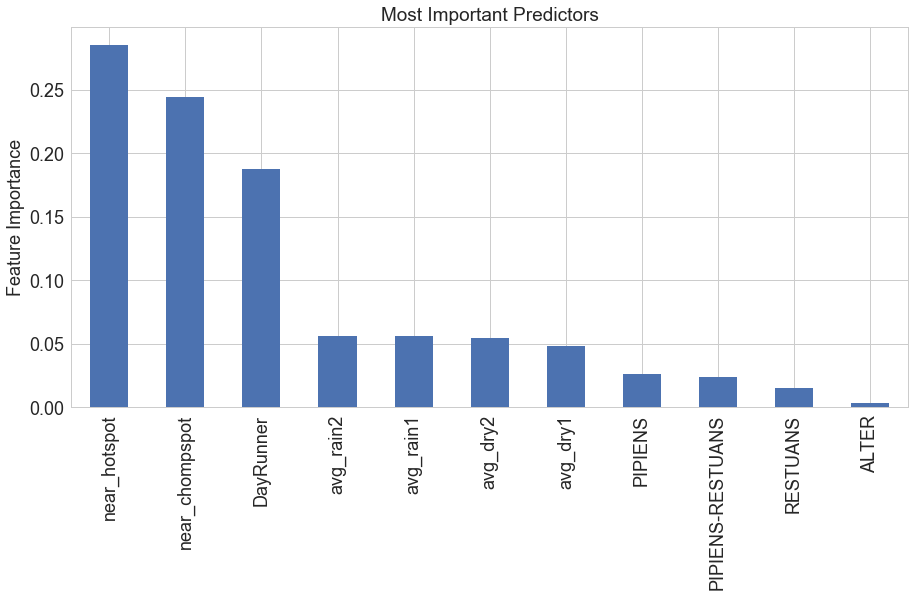

In [34]:
sns.set(style="whitegrid", color_codes=True)
ax = top15.plot(kind='bar', legend=False, fontsize=18, figsize=(15, 7))
plt.xticks(rotation = 90,  fontsize=18)
plt.title('Most Important Predictors',  fontsize=19)
plt.yticks(rotation = 0,  fontsize=18)
plt.ylabel('Feature Importance', rotation=90,  fontsize=18) 

# Compare Models

In [35]:
# Recap those scores for me, please.
models=['KNN', 'Logistic', 'Random Forest']
cols=['Model', 'Accuracy', 'Sensitivity', 'Specificity', 'ROC-AUC']
print(acc)
print(sens)
print(spec)
print(roc)

[94.43387250237869, 94.76688867745004, 94.24357754519505]
[1.8181818181818181, 0.0, 7.2727272727272725]
[99.54819277108433, 100.0, 99.04618473895583]
[50.68318729463308, 50.0, 53.15945600584154]


In [36]:
# Show me that in a table:
model_scores=pd.DataFrame(list(map(list, zip(models, acc, sens, spec, roc))), columns=cols)
model_scores

,Model,Accuracy,Sensitivity,Specificity,ROC-AUC
0,KNN,94.433873,1.818182,99.548193,50.683187
1,Logistic,94.766889,0.000000,100.000000,50.000000
2,Random Forest,94.243578,7.272727,99.046185,53.159456


Text(0,0.5,'Score')

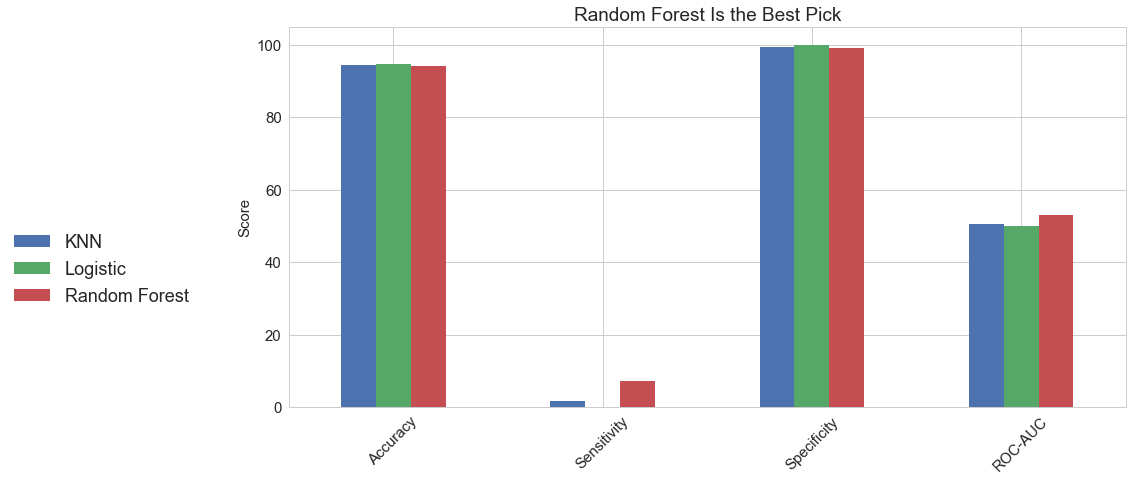

In [37]:
# Make it pretty. 
ax = model_scores.set_index('Model').T.plot(kind='bar', legend=False, fontsize=12, figsize=(15, 7))
ax.legend(loc=1, fontsize=18, bbox_to_anchor=(-0.1, 0.5))
plt.xticks(rotation = 45,  fontsize=15)
plt.title('Random Forest Is the Best Pick',  fontsize=19)
plt.yticks(rotation = 0,  fontsize=15)
plt.ylabel('Score', rotation=90,  fontsize=15)  

## Pickle Time

In [38]:
import pickle

with open('tree_model.pickle', 'wb') as f:
    pickle.dump(tree_model, f, protocol=0)

In [39]:
print(len(X_train.columns))
X_train.columns

11


Index(['DayRunner', 'ALTER', 'PIPIENS', 'PIPIENS-RESTUANS', 'RESTUANS',
       'near_hotspot', 'near_chompspot', 'avg_rain1', 'avg_rain2', 'avg_dry1',
       'avg_dry2'],
      dtype='object')

## Neural Net

In [40]:
import tensorflow as tensor
import keras
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Using TensorFlow backend.


In [41]:
net_model = Sequential()
net_model.add(Dense(output_dim = 20,init ='uniform',activation = 'relu',input_dim=11))

net_model.add(Dense(20, activation = 'relu'))
net_model.add(Dense(20, activation = 'relu'))

net_model.add(Dense(activation="softmax", input_dim=20, units=2, kernel_initializer="uniform"))
net_model.compile(loss='categorical_crossentropy', optimizer='adam')

history = net_model.fit(X_train, to_categorical(y_train), 
            validation_data=(X_test, to_categorical(y_test)),
            epochs=6,
            batch_size=6,
            verbose = True)




/Users/austinlasseter/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=20, kernel_initializer="uniform")`
  


Train on 8404 samples, validate on 2102 samples
Epoch 1/6
8404/8404 [==============================] - 2s 252us/step - loss: 0.2117 - val_loss: 0.1849
Epoch 2/6
8404/8404 [==============================] - 2s 197us/step - loss: 0.1763 - val_loss: 0.1788
Epoch 3/6
8404/8404 [==============================] - 2s 215us/step - loss: 0.1714 - val_loss: 0.1794
Epoch 4/6
8404/8404 [==============================] - 2s 198us/step - loss: 0.1699 - val_loss: 0.1778
Epoch 5/6
8404/8404 [==============================] - 2s 191us/step - loss: 0.1688 - val_loss: 0.1763
Epoch 6/6
8404/8404 [==============================] - 2s 192us/step - loss: 0.1675 - val_loss: 0.1762


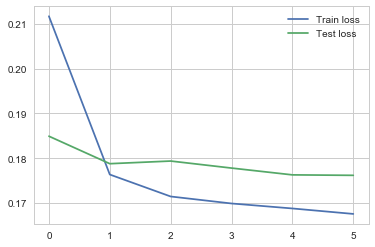

In [42]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(test_loss, label='Test loss')
plt.legend()

In [82]:
y_pred = net_model.predict_proba(X_test)
y_pred2 = y_pred[:,1]
print(roc_auc_score(y_test, y_pred2))
print(y_pred[:5])

0.8018688389923329
[[9.9999964e-01 3.1559392e-07]
 [7.5693065e-01 2.4306938e-01]
 [9.9025774e-01 9.7422814e-03]
 [9.9952841e-01 4.7156325e-04]
 [9.9273551e-01 7.2644833e-03]]


In [80]:
results=pd.DataFrame(y_pred2, columns=['column1'])
print(results.columns)
print(results.head())
results['column1'].describe()

Index(['column1'], dtype='object')
        column1
0  3.155939e-07
1  2.430694e-01
2  9.742281e-03
3  4.715633e-04
4  7.264483e-03


count    2.102000e+03
mean     5.668914e-02
std      7.283149e-02
min      1.487984e-08
25%      2.733177e-03
50%      2.556482e-02
75%      7.820997e-02
max      3.786433e-01
Name: column1, dtype: float64

In [66]:
y_pred3 = y_pred[:,1].round(0)
y_pred3

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [77]:
results=pd.DataFrame(y_pred3, columns=['column1'])
print(results.columns)
print(results.head())
results['column1'].value_counts()

Index(['column1'], dtype='object')
   column1
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0


0.0    2102
Name: column1, dtype: int64

## Pickle Time

In [43]:
# import pickle

# with open('net_model.pickle', 'wb') as f:
#      pickle.dump(net_model, f, protocol=0)

## Import `test.csv` and apply the neural net

In [44]:
path = '../kaggle_data/input/'
test = pd.read_csv(path+'test.csv')
weather=pd.read_csv('weather2.csv')
chicago=pd.merge(test, weather, on='Date');
print(chicago.shape)
chicago.head(3)

(116293, 15)


,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,avg_rain1,avg_rain2,avg_dry1,avg_dry2
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1.0,0.571429,0.142857,0.714286
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1.0,0.571429,0.142857,0.714286
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1.0,0.571429,0.142857,0.714286


In [45]:
# Reduce the species categorical variable to just 4 categories
chicago['CULEX']='ALTER'
chicago.loc[(chicago['Species']=='CULEX PIPIENS/RESTUANS') , 'CULEX']='PIPIENS-RESTUANS'
chicago.loc[(chicago['Species']=='CULEX RESTUANS') , 'CULEX']='RESTUANS'
chicago.loc[(chicago['Species']=='CULEX PIPIENS') , 'CULEX']='PIPIENS'
chicago['CULEX'].value_counts()
# Dummify the Species
dummies=pd.get_dummies(chicago['CULEX'])
chicago=pd.concat([chicago, dummies], axis=1)

In [46]:
# Let's convert date/time into something usable. 
chicago['Month']=chicago['Date'].str.split('-').str[1].astype(str)
chicago['Year']=chicago['Date'].str.split('-').str[0].astype(int)
# Day of the year
chicago['DayRunner']=pd.to_datetime(chicago['Date']).dt.dayofyear

In [47]:
# How many of all the lat-long combos have ever tested positive for the virus?
chicago['lat_long'] = list(zip(chicago['Latitude'], chicago['Longitude']))
latlongs=chicago.groupby('lat_long').mean()

In [48]:
# Certain lat-longs have the virus more frequently. That's useful!
import pickle
with open('top_hots.pickle', 'rb') as f:
    top_hots = pickle.load(f)

In [51]:
# For each trap, let's calculate its distance from the top virus hotspots
from geopy.distance import vincenty
for x in range(30):
    digit=str(x)
    chicago['to_hotspot'+digit]=chicago['lat_long'].apply(lambda row: vincenty(row, top_hots[x]).miles)
    
    # Create an indicator if a row is less than 2 miles from one of the virus hotspots
    chicago['flag_hotspot'+digit]=chicago['to_hotspot'+digit].apply(lambda row: row<2).astype(int)
    
# Summarize those indicators.
hot_list=['flag_hotspot0',
          'flag_hotspot1',
          'flag_hotspot2',
          'flag_hotspot3',
          'flag_hotspot4',
          'flag_hotspot6',
          'flag_hotspot6',
          'flag_hotspot7',
          'flag_hotspot8',
          'flag_hotspot9',
          'flag_hotspot10',
          'flag_hotspot11',
          'flag_hotspot12',
          'flag_hotspot13',
          'flag_hotspot14',
          'flag_hotspot16',
          'flag_hotspot16',
          'flag_hotspot17',
          'flag_hotspot18',
          'flag_hotspot19',
          'flag_hotspot20',
          'flag_hotspot21',
          'flag_hotspot22',
          'flag_hotspot23',
          'flag_hotspot24',
          'flag_hotspot26',
          'flag_hotspot26',
          'flag_hotspot27',
          'flag_hotspot28',
          'flag_hotspot29',
         ]
chicago['near_hotspot'] = chicago[hot_list].sum(axis=1)
chicago['near_hotspot'].describe()

count    116293.000000
mean          1.661158
std           1.851068
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max           8.000000
Name: near_hotspot, dtype: float64

In [52]:
# Are there some lat-longs with higher mosquito counts? Yes.
with open('top_chomps.pickle', 'rb') as f:
    top_chomps = pickle.load(f)

In [53]:
# Do the same thing for its distance from the 20 spots with highest average mosquito count.
for x in range(30):
    digit=str(x)
    chicago['to_chompspot'+digit]=chicago['lat_long'].apply(lambda row: vincenty(row, top_chomps[x]).miles)   

    # Create an indicator if a row is less than 2 miles from one of the high-mosquito-count chompspots
    chicago['flag_chompspot'+digit]=chicago['to_chompspot'+digit].apply(lambda row: row<2).astype(int)
    
# Summarize those 10 indicators.
chomp_list=['flag_chompspot0',
          'flag_chompspot1',
          'flag_chompspot2',
          'flag_chompspot3',
          'flag_chompspot4',
          'flag_chompspot6',
          'flag_chompspot6',
          'flag_chompspot7',
          'flag_chompspot8',
          'flag_chompspot9',
          'flag_chompspot10',
          'flag_chompspot11',
          'flag_chompspot12',
          'flag_chompspot13',
          'flag_chompspot14',
          'flag_chompspot16',
          'flag_chompspot16',
          'flag_chompspot17',
          'flag_chompspot18',
          'flag_chompspot19',
          'flag_chompspot20',
          'flag_chompspot21',
          'flag_chompspot22',
          'flag_chompspot23',
          'flag_chompspot24',
          'flag_chompspot26',
          'flag_chompspot26',
          'flag_chompspot27',
          'flag_chompspot28',
          'flag_chompspot29',
         ]
chicago['near_chompspot'] = chicago[chomp_list].sum(axis=1)
chicago['near_chompspot'].describe()

count    116293.000000
mean          1.192221
std           1.321861
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: near_chompspot, dtype: float64

In [54]:
# Create a list of (nearly) all the variables we just created 
drop_list=[]
for x in range(30):
    digit=str(x)
    drop_list.append('to_hotspot'+digit)
    drop_list.append('flag_hotspot'+digit)
    drop_list.append('to_chompspot'+digit)
    drop_list.append('flag_chompspot'+digit)
# Drop them becuase they are no longer necessary.
chicago=chicago.drop(hot_list + chomp_list + drop_list, axis=1)

In [55]:
chicago=chicago.drop(['Street', 'Block', 'Trap', 'Address', 'AddressAccuracy',
                      'AddressNumberAndStreet', 'Date', 'Species', 'CULEX',
                      'Latitude', 'Longitude', 'Month', 'Year', 'lat_long'], axis=1)
# We'll drop Id a little further down

In [56]:
# Predict the y values on the testing data.
y_hat = net_model.predict(chicago.drop(['Id'], axis=1))
print(len(y_hat))

116293


In [90]:
y_hat = net_model.predict_proba(chicago.drop(['Id'], axis=1))
y_hat2 = y_hat[:,1]
print(y_hat2[:5])
print(len(y_hat2))

[0. 0. 0. 0. 0.]
116293


## Kaggle Submission

In [91]:
submission=pd.DataFrame(list(zip(chicago['Id'],y_hat2)), columns=['Id','WnvPresent'])
print(len(submission))
submission.head(3)

116293


,Id,WnvPresent
0,1,0.0
1,2,0.0
2,3,0.0


In [92]:
dirname = '../Austin/'
submission.to_csv(dirname + 'submission.csv', index=False)

In [ ]:
# https://www.kaggle.com/c/predict-west-nile-virus/submit